Enter the annual gross income (excluding social security) you would like in retirement


 78000


Enter your current age


 20


Enter your desired retirement age - standard is 67


 67


Enter how much you currently have invested for retirement


 0




The orange and blue lines are 2 different contribution plans.
Orange assumes a consistent amount of real contributions.
Blue assumes a 4% increase in real contributions each year.
Both will yield an estimated  $2,106,000 , your retirement fund goal.
This amount can vary significantly based on future returns.



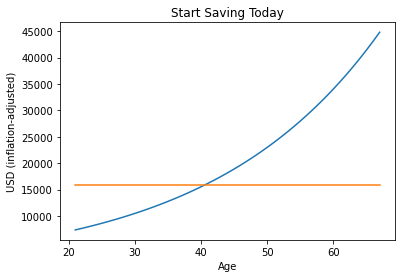

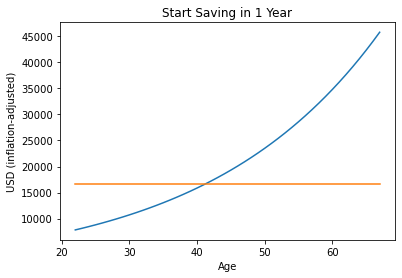

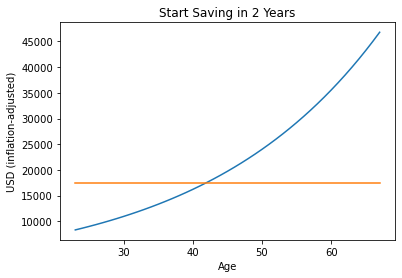

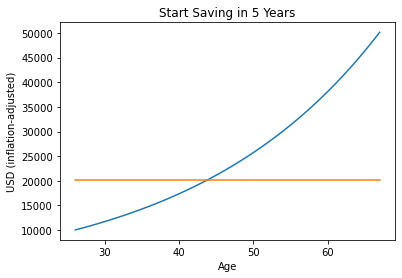

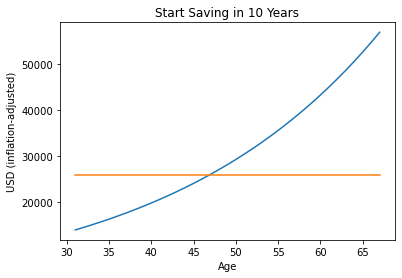

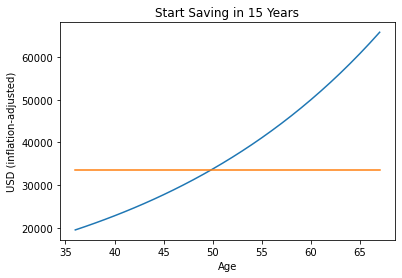

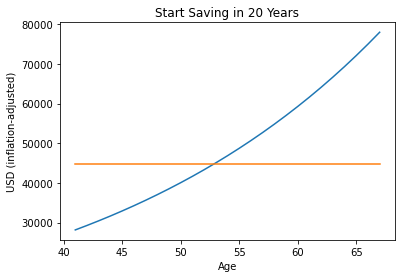

In [18]:
#Purpose:
#To illustrate 
#    1) How much you should be saving for retirement
#    2) The effects of postponing saving for retirement

#Assumptions: 
#3.5% of retirement portfolio taken as income each year after retirement - this is conservative for most people
#Your portfolio will yield 4% real returns each year
#You will contribute at the end of each year
#You will need 27x your yearly expenses to start out in retirement

#Results:
#Your results will be shown for 14 scenarios:
#    1) You contribute the same amount of real dollars per year
#    2) You increase your real contributions by 4% per year
#    and for (1) and (2), whether you start saving now or in 1, 2, 5, 10, 15, or 20 years

#formats an int into USD
def formatAmt(amount: int) -> str:
    return "${:,.0f}".format(amount)

#returns how much the user should contribute in the year in which they start saving for retirement
def firstYearContribution(savings: int, workingYearsLeft: int, retirementIncomeGoal: int, flatContributions: bool) -> int:
    retirementFundGoal = 27 * retirementIncomeGoal
    #find what the current savings will be worth by retirement age, then subtract that from the total needed
    for year in range(workingYearsLeft):
        savings *= 1.04
    retirementFundGoal -= savings
    if (retirementFundGoal <= 0):
        return 0
    
    #case: same real contribution each year
    if flatContributions:
        #equation looks like this: yearly = goal / (1.04^(yearsLeft-1) + 1.04^(yearsLeft-2) + ... + 1.04^0)
        denominator = 0
        for year in range(workingYearsLeft):
            denominator += 1.04 ** year
        return int(retirementFundGoal / denominator)
    
    #case: increasing real contributions
    #equation looks like this: firstYear = goal / (yearsLeft * 1.04^(yearsLeft-1))
    #    this simple equation is a convenient side effect of choosing the same real return estimate and contribution increase (4%)
    return int(retirementFundGoal / (workingYearsLeft * (1.04 ** (workingYearsLeft - 1))))
    
#User Input
print("Enter the annual gross income (excluding social security) you would like in retirement")
retirementIncomeGoal = int(input())
print("Enter your current age")
currentAge = int(input())
print("Enter your desired retirement age - standard is 67")
retirementAge = int(input())
print("Enter how much you currently have invested for retirement")
savings = int(input())

print()
print()
#Enough Savings Already
if not firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True):
    print("You have already saved enough to retire at ", retirementAge)
    print("Try the calculator again with a different retirement age or income goal")
    import sys
    sys.exit()
print("The orange and blue lines are 2 different contribution plans.")
print("Orange assumes a consistent amount of real contributions.")
print("Blue assumes a 4% increase in real contributions each year.")
print("Both will yield an estimated ", formatAmt(retirementIncomeGoal * 27), ", your retirement fund goal.")
print("This amount can vary significantly based on future returns.")
print()

#Graphs
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame()
df['age'] = [currentAge + 1]
df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
for year in range(1, retirementAge - currentAge):
    df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

plt.plot(df['age'], df['incContributions'])
plt.plot(df['age'], df['flatContributions'])
plt.xlabel('Age')
plt.ylabel('USD (inflation-adjusted)')
plt.title('Start Saving Today')
plt.show()

if (retirementAge - currentAge > 1):
    currentAge += 1
    df = pd.DataFrame()
    df['age'] = [currentAge + 1]
    df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
    df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
    for year in range(1, retirementAge - currentAge):
        df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

    plt.plot(df['age'], df['incContributions'])
    plt.plot(df['age'], df['flatContributions'])
    plt.xlabel('Age')
    plt.ylabel('USD (inflation-adjusted)')
    plt.title('Start Saving in 1 Year')
    plt.show()
    
if (retirementAge - currentAge > 1):
    currentAge += 1
    df = pd.DataFrame()
    df['age'] = [currentAge + 1]
    df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
    df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
    for year in range(1, retirementAge - currentAge):
        df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

    plt.plot(df['age'], df['incContributions'])
    plt.plot(df['age'], df['flatContributions'])
    plt.xlabel('Age')
    plt.ylabel('USD (inflation-adjusted)')
    plt.title('Start Saving in 2 Years')
    plt.show()

if (retirementAge - currentAge > 3):
    currentAge += 3
    df = pd.DataFrame()
    df['age'] = [currentAge + 1]
    df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
    df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
    for year in range(1, retirementAge - currentAge):
        df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

    plt.plot(df['age'], df['incContributions'])
    plt.plot(df['age'], df['flatContributions'])
    plt.xlabel('Age')
    plt.ylabel('USD (inflation-adjusted)')
    plt.title('Start Saving in 5 Years')
    plt.show()
    
if (retirementAge - currentAge > 5):
    currentAge += 5
    df = pd.DataFrame()
    df['age'] = [currentAge + 1]
    df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
    df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
    for year in range(1, retirementAge - currentAge):
        df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

    plt.plot(df['age'], df['incContributions'])
    plt.plot(df['age'], df['flatContributions'])
    plt.xlabel('Age')
    plt.ylabel('USD (inflation-adjusted)')
    plt.title('Start Saving in 10 Years')
    plt.show()

if (retirementAge - currentAge > 5):
    currentAge += 5
    df = pd.DataFrame()
    df['age'] = [currentAge + 1]
    df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
    df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
    for year in range(1, retirementAge - currentAge):
        df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

    plt.plot(df['age'], df['incContributions'])
    plt.plot(df['age'], df['flatContributions'])
    plt.xlabel('Age')
    plt.ylabel('USD (inflation-adjusted)')
    plt.title('Start Saving in 15 Years')
    plt.show()
    
if (retirementAge - currentAge > 5):
    currentAge += 5
    df = pd.DataFrame()
    df['age'] = [currentAge + 1]
    df['flatContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, True)]
    df['incContributions'] = [firstYearContribution(savings, retirementAge - currentAge, retirementIncomeGoal, False)]
    for year in range(1, retirementAge - currentAge):
        df.loc[year] = [(year + currentAge + 1)] + [df.at[0, 'flatContributions']] + [(df.at[year - 1, 'incContributions'] * 1.04)]

    plt.plot(df['age'], df['incContributions'])
    plt.plot(df['age'], df['flatContributions'])
    plt.xlabel('Age')
    plt.ylabel('USD (inflation-adjusted)')
    plt.title('Start Saving in 20 Years')
    plt.show()